In [119]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import string
import re

In [60]:
#import datasets
train_df = pd.read_csv("Project Data/train.csv")
test_df = pd.read_csv("Project Data/test.csv")

In [61]:
#visualize train data
train_df.tail(10)

,text,label
9533,"Stocks making the biggest moves midday: Tesla,...",2
9534,"Stocks making the biggest moves midday: Tesla,...",2
9535,"Stocks making the biggest moves midday: Uber, ...",2
9536,Stocks making the biggest moves premarket: Tar...,2
9537,Stocks making the biggest moves premarket: TD ...,2
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2
9542,"YNDX, I, QD and OESX among tech movers",2


In [62]:
#visualize test data
test_df.head(10)

,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Here’s What Hedge Funds Think Evolution Petrol...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: “When growth is scarce, investors s..."
5,5,Marvell Technology (MRVL) Gains As Market Dips...
6,6,UPDATE 1-Italian airline Alitalia's rescue in ...
7,7,why macro funds are shutting down left and rig...
8,8,Uber's arrival caused binge drinking to increa...
9,9,New Dungeons & Dragons game announced


### Exploratory Analysis 

In [63]:
print(f"Train data columns: {train_df.columns}")
print(f"Test data columns: {test_df.columns}")

Train data columns: Index(['text', 'label'], dtype='object')
Test data columns: Index(['id', 'text'], dtype='object')


In [64]:
train_df['text'].describe()

count                                                  9543
unique                                                 9543
top       $BYND - JPMorgan reels in expectations on Beyo...
freq                                                      1
Name: text, dtype: object

In [65]:
#Verify if any value is null
train_df['text'].isna().sum()

0

In [66]:
#WORD COUNT

#add a new column to tain_df with the number os words
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split(" ")))
train_df

,text,label,word_count
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10
1,$CCL $RCL - Nomura points to bookings weakness...,0,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10
...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,16
9539,Tupperware Brands among consumer gainers; Unil...,2,9
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,11
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9


In [67]:
train_df['word_count'].describe()

count    9543.000000
mean       12.168081
std         4.651245
min         1.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: word_count, dtype: float64

In [68]:
#Analysis of col: word_count
print(f"Train data column word_count MAXIMUM: {train_df['word_count'].max()}")
print(f"Train data column word_count MINIMUM: {train_df['word_count'].min()}")
print(f"Train data column word_count MEAN: {train_df['word_count'].mean()}")
print(f"Train data column word_count MEDIAN: {train_df['word_count'].median()}")
print(f"Train data column word_count MODE: {train_df['word_count'].mode()}")
print(f"Train data column word_count SQARE ROOT: {train_df['word_count'].std()}")
print(f"Train data column word_count UNIQUE: {train_df['word_count'].unique()}")

Train data column word_count MAXIMUM: 31
Train data column word_count MINIMUM: 1
Train data column word_count MEAN: 12.168081316147962
Train data column word_count MEDIAN: 11.0
Train data column word_count MODE: 0    10
Name: word_count, dtype: int64
Train data column word_count SQARE ROOT: 4.651245064570518
Train data column word_count UNIQUE: [10 14  7  6 12 11  9  5 16  8 13 20 22 17  4 18 15 19 25 23 21 24 26  1
  2  3 27 29 31]


<AxesSubplot: >

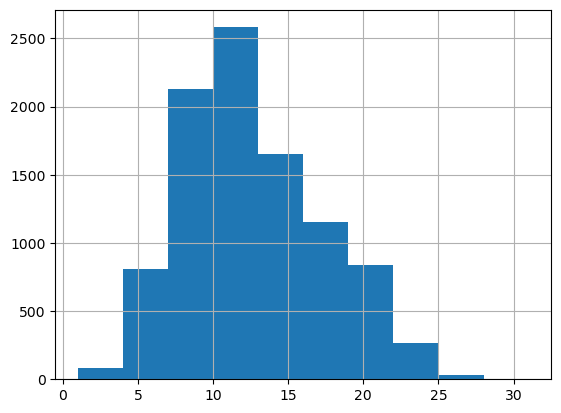

In [69]:
train_df['word_count'].hist()

<AxesSubplot: >

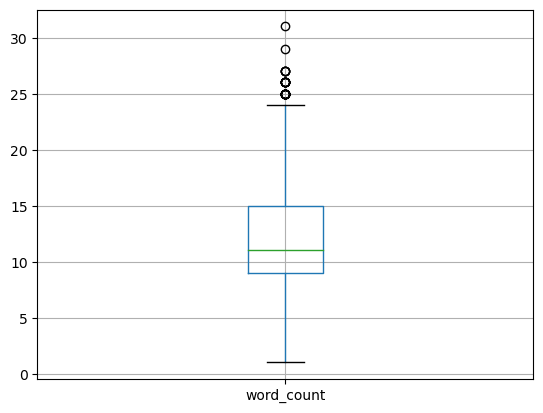

In [70]:
train_df.boxplot('word_count')
#we are not removinf any outlier because every tweet is independent

In [71]:
# Frequency of all words
all_words = ' '.join(train_df['text']).split()
all_words[:10]

['$BYND',
 '-',
 'JPMorgan',
 'reels',
 'in',
 'expectations',
 'on',
 'Beyond',
 'Meat',
 'https://t.co/bd0xbFGjkT']

In [72]:
#Create a DataFrane of all words and their frequencies
wordFreq = pd.Series(all_words).value_counts()

In [73]:
# List of me most common words in all tweets
wordFreq.sort_values(ascending=False)[0:15]

to     2332
the    1820
of     1464
-      1390
in     1361
on     1136
for    1032
a       970
and     898
The     663
at      539
as      528
is      526
by      414
up      388
dtype: int64

In [74]:
wordFreq.index[0:15]

Index(['to', 'the', 'of', '-', 'in', 'on', 'for', 'a', 'and', 'The', 'at',
       'as', 'is', 'by', 'up'],
      dtype='object')

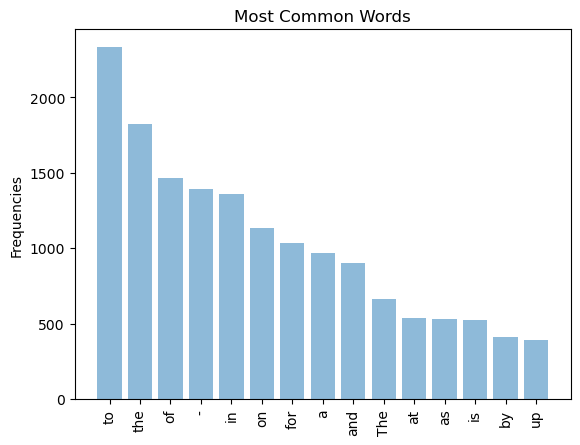

In [75]:
x_labels = wordFreq.index[0:15]
values = wordFreq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(y_pos, x_labels)
plt.ylabel('Frequencies')
plt.title('Most Common Words')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing - Exemple 1: Stop Words

In [76]:
#Remove Punctuation
punctuation = list(set(string.punctuation))
punctuation[:5]

[']', '%', '_', '.', ';']

In [77]:
all_words_noPunctuation = [word.lower() for word in all_words if word not in punctuation]
all_words_noPunctuation[:10]

['$bynd',
 'jpmorgan',
 'reels',
 'in',
 'expectations',
 'on',
 'beyond',
 'meat',
 'https://t.co/bd0xbfgjkt',
 '$ccl']

In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/bm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords

In [80]:
stop = set(stopwords.words('english'))

In [81]:
#creation of variable all_words_clean, this is a text with no punctuations and no stop words
all_words_clean = [word for word in all_words_noPunctuation if word not in stop]
all_words_clean[:10]

['$bynd',
 'jpmorgan',
 'reels',
 'expectations',
 'beyond',
 'meat',
 'https://t.co/bd0xbfgjkt',
 '$ccl',
 '$rcl',
 'nomura']

In [82]:
freq_cleanWords = pd.Series(all_words_clean).value_counts()
freq_cleanWords.sort_values(ascending=False)[0:10] # most frequent word after cleaning

stock              544
new                406
results            352
u.s.               341
says               332
earnings           321
#stock             316
market             296
#marketscreener    285
price              273
dtype: int64

In [83]:
#I decided to remove the 8 monst frequent words to clean more the data
remove_words = list(freq_cleanWords.index[:8])
remove_words

['stock', 'new', 'results', 'u.s.', 'says', 'earnings', '#stock', 'market']

In [84]:
all_words_clean2 = [word for word in all_words_clean if word not in remove_words]
print(f"A total of {len(all_words_clean) - len(all_words_clean2)} words were removed.")

A total of 2908 words were removed.


### Data Preprocessing - Exemple 2: Stemming and Lemmatization

In [85]:
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [86]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/bm/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [87]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/bm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
stemmer = SnowballStemmer('english')

In [89]:
lemma = WordNetLemmatizer()

In [90]:
#Apply preprocessing steps
from tqdm import tqdm
def clean(text_list, lemmatize, stemmer):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        text = re.sub("br", "", text)
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #Stemming
        if stemmer:
            text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [91]:
cleaned_text = clean(train_df['text'], lemmatize = True, stemmer = False)

100%|████████████████████████████████████| 9543/9543 [00:00<00:00, 21733.14it/s]


In [92]:
# Compare text before and after cleaning

train_df['text'][:5] #before cleaning

0    $BYND - JPMorgan reels in expectations on Beyo...
1    $CCL $RCL - Nomura points to bookings weakness...
2    $CX - Cemex cut at Credit Suisse, J.P. Morgan ...
3    $ESS: BTIG Research cuts to Neutral https://t....
4    $FNKO - Funko slides after Piper Jaffray PT cu...
Name: text, dtype: object

In [93]:
cleaned_text[:5]

['bynd jpmorgan reel expectation beyond meat http co bd xbfgjkt',
 'ccl rcl nomura point booking weakness carnival royal caribbean http co ygjpt red',
 'cx cemex cut credit suisse j p morgan weak building outlook http co kn g awfib',
 'es btig research cut neutral http co mcyftsxc n',
 'fnko funko slide piper jaffray pt cut http co z ijmcqzb']

In [94]:
#create a function to update a dataFrame
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"Text": list_updated}))

In [95]:
train_df['Cleaned Text'] = cleaned_text
train_df

,text,label,word_count,Cleaned Text
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10,bynd jpmorgan reel expectation beyond meat htt...
1,$CCL $RCL - Nomura points to bookings weakness...,0,14,ccl rcl nomura point booking weakness carnival...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14,cx cemex cut credit suisse j p morgan weak bui...
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7,es btig research cut neutral http co mcyftsxc n
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10,fnko funko slide piper jaffray pt cut http co ...
...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,16,week gainer loser stoxx europe dec economy mar...
9539,Tupperware Brands among consumer gainers; Unil...,2,9,tupperware ands among consumer gainer unilever...
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,11,vtv therapeutic lead healthcare gainer myomo b...
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,work xpo pyx amkr among hour mover


### Apply Bag of Words

In [96]:
bow = CountVectorizer(binary=True)

In [97]:
# define our X variable
X = bow.fit_transform(train_df['Cleaned Text'])
X

<9543x19897 sparse matrix of type '<class 'numpy.int64'>'
	with 92721 stored elements in Compressed Sparse Row format>

In [98]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [99]:
test_df['Cleaned Text'] = clean(test_df['text'], lemmatize = True, stemmer = False)

100%|████████████████████████████████████| 2388/2388 [00:00<00:00, 20629.47it/s]


In [100]:
#Define ou y variable
y = train_df['label']

In [101]:
#Train with KNN model
knn_model = KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance').fit(X,y)

In [102]:
#Apply BOW
test = bow.transform(test_df['text'])

In [103]:
#Apply KNN to make predictions on test data
predict = knn_model.predict(test)

In [104]:
for review, score in zip(test_df['Cleaned Text'], predict):
    print(f'The predicted score for the review: "{review}", is {score}.')
    print("=_"*20)

The predicted score for the review: "etf asset surge tenfold year trillion bank america predicts", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "hedge fund think evolution petroleum corporation epm", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "pvh phillips van heusen q earnings preview http co knhcywvnbx", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "china process waiving retaliatory tariff import u pork soy domestic company pro http co mzu trbx", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "highlight growth scarce investor seem willing pay growth stock pncbank http co ro fbokbg", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "marvell technology mrvl gain market dip know nasdaq", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "update italian airline alitalia re

In [105]:
#é preciso correr o ponto 5.5 Predict for Test corpus??
#
#

In [106]:
test_df['label'] = predict

In [111]:
X_test = bow.transform(test_df['Cleaned Text'])
y_test = np.array(test_df['label'])

In [112]:
y_pred = knn_model.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 1, 2])

### Evaluate

In [109]:
labels = {'Bearish': 0, 'Bullish':1, 'Neutral':2}

In [116]:
#analyse the results of the test data
print(classification_report(y_pred, y_test, target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.60      0.65      0.62       158
     Bullish       0.67      0.79      0.72       391
     Neutral       0.95      0.91      0.93      1839

    accuracy                           0.87      2388
   macro avg       0.74      0.78      0.76      2388
weighted avg       0.88      0.87      0.87      2388



In [117]:
confusion_matrix(y_pred, y_test)

array([[ 102,   26,   30],
       [  26,  309,   56],
       [  42,  128, 1669]])

/tmp/ipykernel_3068/482435971.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


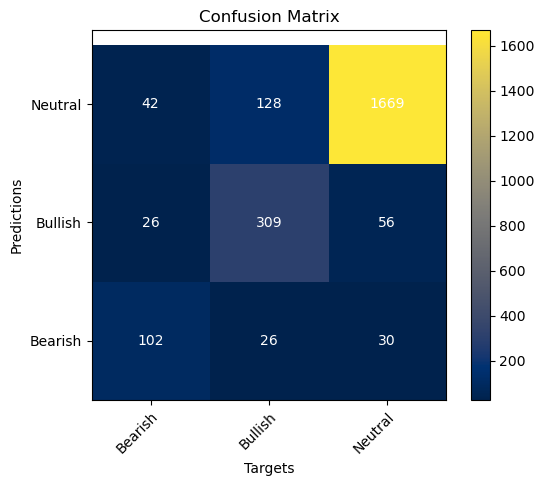

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred, y_test), labels.keys())

### TF-IDF

In [126]:
tfidf = TfidfVectorizer(ngram_range=(1,3))

In [127]:
X = tfidf.fit_transform(test_df['Cleaned Text'])
X

<2388x43435 sparse matrix of type '<class 'numpy.float64'>'
	with 64544 stored elements in Compressed Sparse Row format>

In [136]:
y_tt = test_df['label']

In [128]:
df_tfidf = pd.DataFrame(X[0].T.todense(), index=tfidf.get_feature_names_out(), columns=['TF-IDF'])
df_tfidf

,TF-IDF
aa,0.0
aa zaofod,0.0
aa zaofod sjasymkos,0.0
aac,0.0
aac technology,0.0
...,...
zzjwzj,0.0
zzjwzj http,0.0
zzjwzj http co,0.0
zzxi,0.0


In [132]:
df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
df_tfidf.head(20)

,TF-IDF
etf asset,0.220581
trillion bank,0.220581
america predicts,0.220581
surge tenfold,0.220581
asset surge tenfold,0.220581
tenfold year trillion,0.220581
tenfold,0.220581
tenfold year,0.220581
asset surge,0.220581
trillion bank america,0.220581


In [139]:
knn_model_tfidf = KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance').fit(X,y_tt)

In [140]:
X_test2 = tfidf.transform(test_df['Cleaned Text'])
y_test2 = np.array(test_df['label'])

In [141]:
y_pred2 = knn_model_tfidf.predict(X_test2)

In [142]:
print(classification_report(y_pred2, y_test2, target_names = labels.keys()))
#model is overfiting

              precision    recall  f1-score   support

     Bearish       1.00      1.00      1.00       170
     Bullish       1.00      1.00      1.00       463
     Neutral       1.00      1.00      1.00      1755

    accuracy                           1.00      2388
   macro avg       1.00      1.00      1.00      2388
weighted avg       1.00      1.00      1.00      2388



In [143]:
confusion_matrix(y_pred2, y_test2)

array([[ 170,    0,    0],
       [   0,  463,    0],
       [   0,    0, 1755]])

/tmp/ipykernel_3068/482435971.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


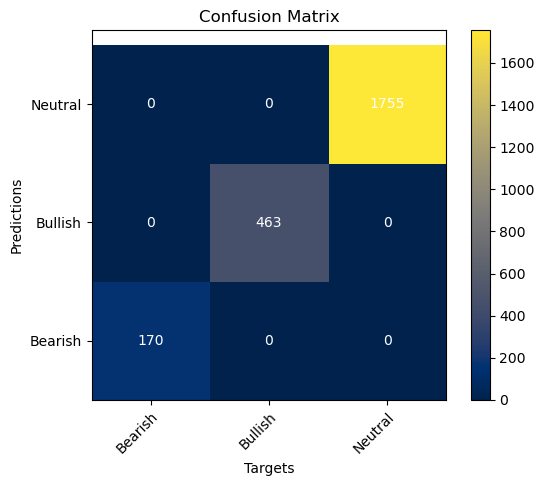

In [144]:
plot_cm(confusion_matrix(y_pred2, y_test2), labels.keys())